In [2300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2301]:
#Importing Data
train_features = pd.read_csv(r'C:\Users\Matth\Desktop\Matthew\Smith MMA\MMA 869 - Machine Learning & AI\Final Team Project\Training Set Features.csv')
train_labs = pd.read_csv(r'C:\Users\Matth\Desktop\Matthew\Smith MMA\MMA 869 - Machine Learning & AI\Final Team Project\Training Set Labels.csv')

test_features = pd.read_csv(r'C:\Users\Matth\Desktop\Matthew\Smith MMA\MMA 869 - Machine Learning & AI\Final Team Project\Test Set Features.csv')

In [2302]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [2303]:
train_features.shape

(59400, 40)

In [2304]:
train_labs.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [2305]:
#Matches up with train set # of cols and also ID
train_labs.shape

(59400, 2)

In [2306]:
combined_df = pd.concat((train_features, train_labs['status_group']), axis =1)

In [2307]:
combined_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2308]:
#Succesfully combined both dfs; 59,400 instances and 41 cols
combined_df.shape

(59400, 41)

In [2309]:
#Also going to add in the test data set as we will do feature engineering & add/remove features
#Will break off before modelling process

combined_df = pd.concat([combined_df, test_features], axis = 0, ignore_index=True)

In [2310]:
#Added an exta 14,850 rows from final test data; will remove prior to modelling process
print(combined_df.shape)
combined_df.info()

(74250, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int

In [2311]:
combined_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2312]:
#Lets check for any null values to see if we are missing data
combined_df.isnull().sum()

#3,635 missing values in both funder & installer; possible connected?
#371 in sub village
#Public meeting 3,334 missing
#Scheme management similar at 3,877
#Permit 3,056 missing
#Scheme_name 28,166 missing vals; this could be significant problem

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [2313]:
#Lets first look at scheme name as has by far the highest amount of missing vals
#A few possible strategies: 1) impute mode or create new class called "missing" (preferred) or 2) delete instances of missing vals (would throw away ~50% of data so not viable)
pd.options.display.max_rows = 100

scheme_nams_vals = pd.DataFrame(combined_df['scheme_name'].value_counts(dropna = False))
scheme_nams_vals.head()

,scheme_name
NaN,35258
K,858
None,794
Borehole,704
Chalinze wate,501


In [2314]:
#Checking how many values are under 50
scheme_nams_vals_under_100 = scheme_nams_vals.loc[scheme_nams_vals['scheme_name'] <100]

scheme_nams_vals_under_100['scheme_name'].count()

2828

In [2315]:
scheme_nams_vals_under_100.head()

,scheme_name
D,98
Mitema,97
Mradi wa maji wa peramiho,96
Olkokola pipe line,96
Sinyanga water supplied sc,95


In [2316]:
#Pulling out column names and creating a list of them
scheme_nams_vals_under_100['col_names'] = scheme_nams_vals_under_100.index

scheme_name_under100_list = scheme_nams_vals_under_100['col_names'].tolist()





<ipython-input-2316-e020a85b746a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheme_nams_vals_under_100['col_names'] = scheme_nams_vals_under_100.index


In [2317]:
#Function to bin <50
combined_df['scheme_name_2'] = combined_df['scheme_name'].apply(lambda x: 'other' if x in scheme_name_under100_list else x)

combined_df[['scheme_name', 'scheme_name_2']].head() #now drop scheme_name to be replaced by scheme_name_2

combined_df.drop('scheme_name', axis = 1, inplace=True)

In [2318]:
#Ensuring that it worked
combined_df['scheme_name_2'].value_counts()

other                                    28727
K                                          858
None                                       794
Borehole                                   704
Chalinze wate                              501
M                                          490
DANIDA                                     483
Government                                 395
Ngana water supplied scheme                335
wanging'ombe water supply s                323
Bagamoyo wate                              296
wanging'ombe supply scheme                 284
I                                          281
Uroki-Bomang'ombe water sup                266
N                                          258
Kirua kahe gravity water supply trust      237
Machumba estate pipe line                  225
Makwale water supplied sche                209
Kijiji                                     205
Handeni Trunk Main(H                       204
S                                          188
Losaa-Kia wat

In [2319]:
#Next look at funder & installer
#Both have similar amount of nan values, so will check to see if id's match up

funder_null_vals = combined_df[['id', 'funder']]
funder_null_vals = funder_null_vals.loc[funder_null_vals['funder'].isnull()]
funder_null_vals

installer_null_vals = combined_df[['id', 'installer']]
installer_null_vals = installer_null_vals.loc[installer_null_vals['installer'].isnull()]
installer_null_vals.rename(columns={'id':'id_install'}, inplace=True)
installer_null_vals

,id_install,installer
34,41583,NaN
43,19282,NaN
47,13620,NaN
65,51072,NaN
71,17386,NaN
...,...,...
74171,4250,NaN
74172,56000,NaN
74195,52726,NaN
74223,21131,NaN


In [2320]:
installer_null_vals.head()

,id_install,installer
34,41583,NaN
43,19282,NaN
47,13620,NaN
65,51072,NaN
71,17386,NaN


In [2321]:
funder_installer_df = pd.concat((funder_null_vals['id'], installer_null_vals['id_install']), axis = 1).apply(pd.to_numeric) #merging together and converting to numeric
funder_installer_df.head()

,id,id_install
34,41583.0,41583.0
43,19282.0,19282.0
47,13620.0,13620.0
65,51072.0,51072.0
71,17386.0,17386.0


In [2322]:
matches = np.intersect1d(funder_installer_df['id'], funder_installer_df['id_install']).tolist()
len(matches) 

#this tells us that of approx. 3,645 total missing vals, 3,582 of them are the same ID (98.2%)

4439

In [2323]:
#Lets do the same and bin any value under 50
combined_df['funder'].value_counts()

Government Of Tanzania          11299
Danida                           3907
Hesawa                           2782
Rwssp                            1703
World Bank                       1701
                                ...  
Mzee Matiti Edwin                   1
Diocese Of Mount Kilimanjaro        1
Wanginyi Water                      1
Mzee Smith                          1
Arabi                               1
Name: funder, Length: 2140, dtype: int64

In [2324]:
#Pulling out funders that appear <50 times
funder_under_50 = combined_df['funder'].value_counts().loc[lambda x: x<=200].index.tolist()

len(funder_under_50)


2083

In [2325]:
#Now modifying the actual df
combined_df['funder'] = combined_df['funder'].apply(lambda x: 'other' if x in funder_under_50 else x)

In [2326]:
#Worked successfully 
combined_df['funder'].value_counts()

other                             20661
Government Of Tanzania            11299
Danida                             3907
Hesawa                             2782
Rwssp                              1703
World Bank                         1701
Kkkt                               1623
World Vision                       1562
Unicef                             1324
Tasaf                              1136
Dhv                                1065
District Council                   1037
Private Individual                 1034
Dwsp                               1012
0                                   980
Norad                               949
Germany Republi                     765
Water                               739
Tcrs                                735
Ministry Of Water                   728
Dwe                                 605
Netherlands                         592
Hifab                               577
Adb                                 551
Lga                                 546


In [2327]:
#Creating a feature to signify if the Gov of Tanzania was the funder; possible that their projects go smoother?

#def gov_funder(df):
#    if df['funder'] == 'Government Of Tanzania':
#        return 1
#    else:
#        return 0
    
#combined_df['gov_funder'] = combined_df.apply(gov_funder, axis =1)


In [2328]:
#Changing to type object
#combined_df['gov_funder'] = combined_df['gov_funder'].astype('object')
#combined_df[['gov_funder', 'funder']]

In [2329]:
#Now lets do the same with Installer
installer_under_50 = combined_df['installer'].value_counts().loc[lambda x: x<=200].index.tolist()

len(installer_under_50)

2361

In [2330]:
#Binning <50 into 'other' category 
combined_df['installer'] = combined_df['installer'].apply(lambda x: 'other' if x in installer_under_50 else x)

combined_df['installer'].value_counts()

other                         22494
DWE                           21751
Government                     2282
RWE                            1498
Commu                          1347
DANIDA                         1305
KKKT                           1120
Hesawa                         1070
0                               980
TCRS                            887
CES                             765
Central government              764
DANID                           690
Community                       687
HESAWA                          679
District Council                663
World vision                    517
TASAF                           504
LGA                             501
WEDECO                          496
District council                490
Gover                           483
AMREF                           398
TWESA                           395
WU                              377
Dmdd                            356
ACRA                            346
World Vision                

In [2331]:
#Similar to above, creating deature signifying if Government installed it
#def gov_installer(df):
#    if df['installer'] == 'Government':
#        return 1
#    else:
#        return 0
#    
#combined_df['gov_installer'] = combined_df.apply(gov_installer, axis =1)

In [2332]:
#Changing to type object
#combined_df['gov_installer']= combined_df['gov_installer'].astype('object')
#combined_df[['gov_installer', 'installer']]

In [2333]:
#Lets segment all the categorical cols and numeric cols so we know which ones we still have to deal with
numeric_feats_combined = combined_df.select_dtypes(include='number').columns.tolist()

print(numeric_feats_combined)
print('There are ', len(numeric_feats_combined), 'numeric features')

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
There are  10 numeric features


In [2334]:
categorical_feats_combined = combined_df.select_dtypes(exclude='number').columns.tolist()

print(categorical_feats_combined)
print('There are ', len(categorical_feats_combined), 'categorical features')

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'scheme_name_2']
There are  31 categorical features


In [2335]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [2336]:
#Lots of different values
#NA is only 371 of the total, so can impute NaN using mode or KNN
combined_df['subvillage'].value_counts(dropna = False).head(20)

Shuleni       646
Majengo       631
Madukani      629
NaN           470
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Songambele    194
Mlimani       190
Miembeni      168
Msikitini     164
1             157
Kanisani      146
Kibaoni       143
Mjini         131
Mjimwema      129
Mapinduzi     126
Name: subvillage, dtype: int64

In [2337]:
#Lets bin values from above under 50

subvillage_under_50 = combined_df['subvillage'].value_counts().loc[lambda x: x<=100].index.tolist()
len(subvillage_under_50)


21389

In [2338]:
#Function to bin values <50
combined_df['subvillage'] = combined_df['subvillage'].apply(lambda x: 'other' if x in subvillage_under_50 else x)
combined_df['subvillage'].value_counts()

other                   66663
Shuleni                   646
Majengo                   631
Madukani                  629
Kati                      467
Mtakuja                   322
Sokoni                    294
M                         243
Muungano                  215
Mbuyuni                   210
Songambele                194
Mlimani                   190
Miembeni                  168
Msikitini                 164
1                         157
Kanisani                  146
Kibaoni                   143
Mjini                     131
Mjimwema                  129
Mapinduzi                 126
Mwenge                    125
Mkwajuni                  125
I                         124
Bondeni                   121
Azimio                    116
Amani                     115
Mabatini                  114
Mbugani                   113
Senta                     111
Mission                   110
Kichangani                110
Mtaa Wa Kitunda Kati      108
Chang'Ombe                108
Zahanati  

In [2339]:
#Obvious issue here with 0 being predominant construction year
#Change 0's to NAN to impute
combined_df['construction_year'].value_counts(dropna = False)

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [2340]:
#Adding in feature to represent age of Waterpoint Type

combined_df['waterpoint_age'] = combined_df['construction_year'].apply(lambda x: 2015 - x if x > 0 else x)

combined_df[['waterpoint_age', 'construction_year']]

,waterpoint_age,construction_year
0,16,1999
1,5,2010
2,6,2009
3,29,1986
4,0,0
...,...,...
74245,27,1988
74246,21,1994
74247,5,2010
74248,6,2009


In [2341]:
#Converting 0 vals into NA for future imputation
combined_df['construction_year'] = combined_df['construction_year'].replace({0:np.nan})
combined_df['waterpoint_age'] = combined_df['waterpoint_age'].replace({0:np.nan})

print('Total NA vals', combined_df['construction_year'].isnull().sum())
print(combined_df['construction_year'].value_counts(dropna=False))

Total NA vals 25969
NaN       25969
2010.0     3314
2008.0     3243
2009.0     3196
2000.0     2578
2007.0     1960
2006.0     1892
2011.0     1591
2003.0     1579
2004.0     1417
2012.0     1347
2002.0     1343
1995.0     1283
2005.0     1275
1978.0     1267
1999.0     1222
1998.0     1190
1985.0     1177
1990.0     1176
1996.0     1020
1980.0     1005
1984.0      970
1994.0      940
1982.0      926
1972.0      892
1997.0      821
1974.0      814
1992.0      807
1993.0      745
2001.0      680
1988.0      657
1983.0      594
1975.0      561
1986.0      553
1976.0      525
1970.0      493
1991.0      407
1989.0      396
1987.0      370
1981.0      291
1977.0      247
1979.0      245
1973.0      227
2013.0      209
1971.0      177
1960.0      124
1963.0      107
1967.0      106
1968.0       93
1969.0       77
1964.0       48
1962.0       36
1961.0       28
1965.0       21
1966.0       19
Name: construction_year, dtype: int64


In [2342]:
#Lets also convert year into a categorical feature rather than leave as numeric
#Bin if under 100 val

combined_df['construction_year'] = combined_df['construction_year'].astype('object')

In [2343]:
constructionyear_under_100 = combined_df['construction_year'].value_counts().loc[lambda x: x<=100].index.tolist()
print(len(constructionyear_under_100))

combined_df['construction_year'] = combined_df['construction_year'].apply(lambda x: 'other' if x in constructionyear_under_100 else x)
print(combined_df['construction_year'].value_counts())

7
2010.0    3314
2008.0    3243
2009.0    3196
2000.0    2578
2007.0    1960
2006.0    1892
2011.0    1591
2003.0    1579
2004.0    1417
2012.0    1347
2002.0    1343
1995.0    1283
2005.0    1275
1978.0    1267
1999.0    1222
1998.0    1190
1985.0    1177
1990.0    1176
1996.0    1020
1980.0    1005
1984.0     970
1994.0     940
1982.0     926
1972.0     892
1997.0     821
1974.0     814
1992.0     807
1993.0     745
2001.0     680
1988.0     657
1983.0     594
1975.0     561
1986.0     553
1976.0     525
1970.0     493
1991.0     407
1989.0     396
1987.0     370
other      322
1981.0     291
1977.0     247
1979.0     245
1973.0     227
2013.0     209
1971.0     177
1960.0     124
1963.0     107
1967.0     106
Name: construction_year, dtype: int64


In [2344]:
#Not too much issue here; just change to object type
#On second thought, that 1 off 40 value can cause issues; lets bin into class under 500
combined_df['region_code'].value_counts(dropna=False)

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64

In [2345]:
#Changing to object type
combined_df['region_code'] = combined_df['region_code'].astype('object')

#Binng region code 40 with region code 8
regioncode_under_300 = combined_df['region_code'].value_counts().loc[lambda x: x<=300].index.tolist()
print(len(regioncode_under_300))

combined_df['region_code'] = combined_df['region_code'].apply(lambda x: 'other' if x in regioncode_under_300 else x)
print(combined_df['region_code'].value_counts())

1
11       6608
17       6334
12       5759
3        5494
5        5079
18       4183
19       3824
2        3709
16       3533
10       3306
4        3145
1        2779
13       2536
14       2488
20       2451
15       2242
6        2032
21       1972
80       1536
60       1298
90       1133
7        1020
99        512
9         499
24        402
8         375
other       1
Name: region_code, dtype: int64


In [2346]:
#Does not have any missing values
combined_df['district_code'].value_counts()

1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

In [2347]:
#Do the same with district code
combined_df['district_code'] = combined_df['district_code'].astype('object')

#Binng district codes uner 300
districtcode_under_300 = combined_df['district_code'].value_counts().loc[lambda x: x<=300].index.tolist()
print(len(districtcode_under_300))

combined_df['district_code'] = combined_df['district_code'].apply(lambda x: 'other' if x in districtcode_under_300 else x)
print(combined_df['district_code'].value_counts())


6
1        15299
2        13929
3        12521
4        11253
5         5428
6         5108
7         4166
8         1282
30        1256
33        1063
53         921
43         653
other      515
13         496
23         360
Name: district_code, dtype: int64


In [2348]:
#Lets take a look at the date column
#High cardinality; change to a year variable
combined_df['date_recorded'].isnull().sum()

combined_df['date_recorded'].value_counts()

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
             ... 
2011-09-27      1
2004-01-12      1
2011-09-21      1
2011-09-09      1
2011-09-25      1
Name: date_recorded, Length: 369, dtype: int64

In [2349]:
#Year of inspection is taking the year and dropping the day/month of inspection to reduce cardinality
combined_df['year_of_inspection'] = combined_df['date_recorded'].apply(lambda x: x[0:4]).astype('int')
combined_df['year_of_inspection'].head()


0    2011
1    2013
2    2013
3    2013
4    2011
Name: year_of_inspection, dtype: int32

In [2350]:
#Creating final variable call years since inspected which is subtracting 2015 from year of inspection
#Assuming data was collected in 2015
combined_df['years_since_inspected'] = combined_df['year_of_inspection'].apply(lambda x: 2015 - x)

combined_df['years_since_inspected'].value_counts()

4     35908
2     30210
3      8089
11       41
14        1
13        1
Name: years_since_inspected, dtype: int64

In [2351]:
#Now lets drop date_recorded and year of inspection features; keeping years_since_inspected
combined_df.drop('date_recorded', axis = 1, inplace=True)
combined_df.drop('year_of_inspection', axis = 1, inplace=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   funder                 69746 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   installer              69718 non-null  object 
 5   longitude              74250 non-null  float64
 6   latitude               74250 non-null  float64
 7   wpt_name               74250 non-null  object 
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  object 
 10  subvillage             73780 non-null  object 
 11  region                 74250 non-null  object 
 12  region_code            74250 non-null  object 
 13  district_code          74250 non-null  object 
 14  lga                    74250 non-null  object 
 15  wa

In [2352]:
#Checking which categorical features are still left to deal with
categorical_feats_combined

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group',
 'scheme_name_2']

In [2353]:
#High Cardinality again; similar binning procedure <50
combined_df['wpt_name'].value_counts()

none                    4440
Shuleni                 2183
Zahanati                1034
Msikitini                647
Kanisani                 390
                        ... 
Kwa Said Ramadhani         1
Zahanati Ya Mwankoko       1
Mahelelo Groups            1
Kidiaunga                  1
Kwa Kuminyapi              1
Name: wpt_name, Length: 45684, dtype: int64

In [2354]:
#Function to bin under 100
wpt_under_100 = combined_df['wpt_name'].value_counts().loc[lambda x: x<=100].index.tolist()
print(len(wpt_under_100))

combined_df['wpt_name'] = combined_df['wpt_name'].apply(lambda x: 'other' if x in wpt_under_100 else x)
print(combined_df['wpt_name'].value_counts())

45664
other              62712
none                4440
Shuleni             2183
Zahanati            1034
Msikitini            647
Kanisani             390
Sokoni               328
Bombani              323
Ofisini              321
School               260
Shule Ya Msingi      247
Shule                191
Sekondari            178
Muungano             159
Mkombozi             145
Upendo               130
Madukani             128
Mbugani              113
Kituo Cha Afya       113
Umoja                105
Mkuyuni              103
Name: wpt_name, dtype: int64


In [2355]:
#Basin looks fine; no missing vals and <10 categories
print(combined_df['basin'].isnull().sum())
combined_df['basin'].value_counts()

0


Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

In [2356]:
#Similar to above; no missing vals and not too many categories - can leave as is
print(combined_df['region'].isnull().sum())
combined_df['region'].value_counts()

0


Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [2357]:
#No missing vals by high cardinality; will bin vals under 50
print(combined_df['lga'].isnull().sum())
combined_df['lga'].value_counts()

0


Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
                ... 
Songea Urban     103
Kigoma Urban      95
Arusha Urban      82
Lindi Urban       24
Nyamagana          2
Name: lga, Length: 125, dtype: int64

In [2358]:
#Function to bin under 300
#Tried 100 initially but cardianlity still too high
lga_under_300 = combined_df['lga'].value_counts().loc[lambda x: x<=600].index.tolist()
print(len(lga_under_300))

combined_df['lga'] = combined_df['lga'].apply(lambda x: 'other' if x in lga_under_300 else x)
print(combined_df['lga'].nunique()) #Still 84 unique vals after binning; may revisit to reduce later on 

74
52


In [2359]:
#Similar issue here; highest val goes up to 307, so will only try to bin up to 50
#No missing vals 
print(combined_df['ward'].isnull().sum())
combined_df['ward'].value_counts()

0


Igosi        386
Imalinyi     318
Siha Kati    297
Mdandu       292
Nduruma      261
            ... 
Sungwisi       1
Linda          1
Chinugulu      1
Mlimani        1
Themi          1
Name: ward, Length: 2098, dtype: int64

In [2360]:
#Function to bin under 50
#Tried 50 but still too high; went with 100 in the end
ward_under_100 = combined_df['ward'].value_counts().loc[lambda x: x<=135].index.tolist()
print(len(ward_under_100))

combined_df['ward'] = combined_df['ward'].apply(lambda x: 'other' if x in ward_under_100 else x)
print(combined_df['ward'].nunique()) 

2057
42


In [2361]:
#Will impute missing vals with mode; other than that leave as is
print(combined_df['public_meeting'].isnull().sum())
combined_df['public_meeting'].value_counts(dropna=False)

4155


True     63749
False     6346
NaN       4155
Name: public_meeting, dtype: int64

In [2362]:
#None missing and all by same company; may remove later as probably does not add any value to model
print(combined_df['recorded_by'].isnull().sum())
combined_df['recorded_by'].value_counts()

0


GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

In [2363]:
#3877 missing vals; will impute in pipeline
#Bin bottom 3 categories in already existing 'Other' column
print(combined_df['scheme_management'].isnull().sum())
combined_df['scheme_management'].value_counts()

4846


VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [2364]:
#Function to bin bottom 3 categories with already existing 'Other' column
schememan_under_766 = combined_df['scheme_management'].value_counts().loc[lambda x: x<=766].index.tolist()
print(len(schememan_under_766))

combined_df['scheme_management'] = combined_df['scheme_management'].apply(lambda x: 'Other' if x in schememan_under_766 else x)
print(combined_df['scheme_management'].nunique()) 
print(combined_df['scheme_management'].value_counts())

3
9
VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                1212
Name: scheme_management, dtype: int64


In [2365]:
#Checking which categorical features are still left to deal with
categorical_feats_combined

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group',
 'scheme_name_2']

In [2366]:
#Mostly T/F responses; will impute missing vals
print(combined_df['permit'].isnull().sum())
combined_df['permit'].value_counts()

3793


True     48606
False    21851
Name: permit, dtype: int64

In [2367]:
#No missing vals, but will bin <50 together into other_2 since other already exists
print(combined_df['extraction_type'].isnull().sum())
combined_df['extraction_type'].value_counts()

0


gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [2368]:
#Binning vals <50 together
ex_type_under50 = combined_df['extraction_type'].value_counts().loc[lambda x: x<=50].index.tolist()
print(len(ex_type_under50))

combined_df['extraction_type'] = combined_df['extraction_type'].apply(lambda x: 'other_2' if x in ex_type_under50 else x)
print(combined_df['extraction_type'].nunique()) 
print(combined_df['extraction_type'].value_counts())

2
17
gravity              33263
nira/tanira          10205
other                 8102
submersible           5982
swn 80                4588
mono                  3628
india mark ii         3029
afridev               2208
ksb                   1790
other - rope pump      572
other - swn 81         284
windmill               152
india mark iii         135
cemo                   108
other - play pump      101
walimi                  60
other_2                 43
Name: extraction_type, dtype: int64


In [2369]:
#Very similar to above class although missing 3 categories in comparison; potential to remove later on
print(combined_df['extraction_type_group'].isnull().sum())
print(combined_df['extraction_type_group'].nunique()) 
combined_df['extraction_type_group'].value_counts()

0
13


gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [2370]:
#Again similar to above features although this only has 7 categories in comparison to 13 and 16 above
#Potential to remove one or two of these features later on
print(combined_df['extraction_type_class'].isnull().sum())
print(combined_df['extraction_type_class'].nunique()) 
combined_df['extraction_type_class'].value_counts()

0
7


gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [2371]:
#Creating feature that indicates whether or not a pump was used

def used_pump(df):
    if df['extraction_type_class'] == 'handpump' or df['extraction_type_class'] == 'motorpump' or df['extraction_type_class'] == 'rope pump':
        return 1
    else:
        return 0
    
combined_df['used_pump'] = combined_df.apply(used_pump, axis = 1)

In [2372]:
#Changing to type object
combined_df['used_pump'] = combined_df['used_pump'].astype('object')
print(combined_df[['used_pump', 'extraction_type_class']])

      used_pump extraction_type_class
0             0               gravity
1             0               gravity
2             0               gravity
3             0           submersible
4             0               gravity
...         ...                   ...
74245         1             motorpump
74246         1              handpump
74247         0               gravity
74248         0               gravity
74249         0               gravity

[74250 rows x 2 columns]


In [2373]:
#No missing vals and 12 categories; can prob remain as is for now
print(combined_df['management'].isnull().sum())
print(combined_df['management'].nunique()) 
combined_df['management'].value_counts()

0
12


vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [2374]:
#No missing vals and 5 categories; leave as is
print(combined_df['management_group'].isnull().sum())
print(combined_df['management_group'].nunique()) 
combined_df['management_group'].value_counts()

0
5


user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [2375]:
#No missing vals and 7 categories; leave as is
print(combined_df['payment'].isnull().sum())
print(combined_df['payment'].nunique()) 
combined_df['payment'].value_counts()

0
7


never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [2376]:
#No missing vals and 7 categories; looks to be EXACT match as above payment feature
print(combined_df['payment_type'].isnull().sum())
print(combined_df['payment_type'].nunique()) 
combined_df['payment_type'].value_counts()

0
7


never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

In [2377]:
#Going to drop PAYMENT column, as I like how payment_type is worded better
combined_df.drop('payment', axis=1, inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   funder                 69746 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   installer              69718 non-null  object 
 5   longitude              74250 non-null  float64
 6   latitude               74250 non-null  float64
 7   wpt_name               74250 non-null  object 
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  object 
 10  subvillage             73780 non-null  object 
 11  region                 74250 non-null  object 
 12  region_code            74250 non-null  object 
 13  district_code          74250 non-null  object 
 14  lga                    74250 non-null  object 
 15  wa

In [2378]:
#Lets also combine 'uknown' and 'other' together as they represent the same thing
combined_df['payment_type'] = combined_df['payment_type'].replace({'other': 'unknown'})

In [2379]:
combined_df['payment_type'].value_counts()

never pay     31712
unknown       11463
per bucket    11266
monthly       10397
on failure     4842
annually       4570
Name: payment_type, dtype: int64

In [2380]:
#Creating a payment_type option to indicate a consistent income stream

def consistent_income(df):
    if df['payment_type'] == 'monthly' or df['payment_type'] == 'annually' or df['payment_type'] == 'per bucket':
        return 1
    else:
        return 0
    
combined_df['consistent_payment'] = combined_df.apply(consistent_income, axis =1)

In [2381]:
combined_df['consistent_payment'] = combined_df['consistent_payment'].astype('object')

print(combined_df[['consistent_payment', 'payment_type']])

      consistent_payment payment_type
0                      1     annually
1                      0    never pay
2                      1   per bucket
3                      0    never pay
4                      0    never pay
...                  ...          ...
74245                  0    never pay
74246                  1     annually
74247                  0    never pay
74248                  0    never pay
74249                  0    never pay

[74250 rows x 2 columns]


In [2382]:
#Checking which categorical features are still left to deal with
categorical_feats_combined

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group',
 'scheme_name_2']

In [2383]:
#No missing vals and 8 categories; last one only has 17 vals but will keep as is for now
print(combined_df['water_quality'].isnull().sum())
print(combined_df['water_quality'].nunique()) 
combined_df['water_quality'].value_counts()

0
8


soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [2384]:
#No missing vals and 6 categories; looks similar to feature above with 'good' and 'soft' aligning
#Will leave as is for now, potential to remove one of these features later one
print(combined_df['quality_group'].isnull().sum())
print(combined_df['quality_group'].nunique()) 
combined_df['quality_group'].value_counts()

0
6


good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

In [2385]:
#No missing vals and 5 categories; leave as is
print(combined_df['quantity'].isnull().sum())
print(combined_df['quantity'].nunique()) 
combined_df['quantity'].value_counts()

0
5


enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [2386]:
#Exactly the same as above; dropping feature above
print(combined_df['quantity_group'].isnull().sum())
print(combined_df['quantity_group'].nunique()) 
combined_df['quantity_group'].value_counts()

0
5


enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

In [2387]:
#Creating a feature that indicates if quantity is bad
#ie includes insufficient and dry

def water_quantity(df):
    if df['quantity_group'] == 'insufficient' or df['quantity_group'] == 'dry':
        return 'poor'
    elif df['quantity_group'] == 'unknown':
        return 'unknown'
    else:
        return 'sufficient'

combined_df['water_quant_class'] = combined_df.apply(water_quantity, axis=1)

print(combined_df[['water_quant_class', 'quantity_group']])

      water_quant_class quantity_group
0            sufficient         enough
1                  poor   insufficient
2            sufficient         enough
3                  poor            dry
4            sufficient       seasonal
...                 ...            ...
74245        sufficient         enough
74246              poor   insufficient
74247              poor   insufficient
74248              poor   insufficient
74249              poor            dry

[74250 rows x 2 columns]


In [2388]:
#Creating another feature indicating if an instance has enough water and good water quality

def good_qual_sufficient(df):
    if df['quantity_group'] == 'enough' and df['quality_group'] == 'good':
        return 1
    else:
        return 0


In [2389]:
combined_df['good_qual_sufficient'] = combined_df.apply(good_qual_sufficient, axis = 1)

print(combined_df[['good_qual_sufficient', 'quantity_group', 'quality_group']])

       good_qual_sufficient quantity_group quality_group
0                         1         enough          good
1                         0   insufficient          good
2                         1         enough          good
3                         0            dry          good
4                         0       seasonal          good
...                     ...            ...           ...
74245                     1         enough          good
74246                     0   insufficient         salty
74247                     0   insufficient          good
74248                     0   insufficient          good
74249                     0            dry          good

[74250 rows x 3 columns]


In [2390]:
#Converting indicator to object class
combined_df['good_qual_sufficient'] = combined_df['good_qual_sufficient'].astype('category')


In [2391]:
combined_df.drop('quantity', axis =1, inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     74250 non-null  int64   
 1   amount_tsh             74250 non-null  float64 
 2   funder                 69746 non-null  object  
 3   gps_height             74250 non-null  int64   
 4   installer              69718 non-null  object  
 5   longitude              74250 non-null  float64 
 6   latitude               74250 non-null  float64 
 7   wpt_name               74250 non-null  object  
 8   num_private            74250 non-null  int64   
 9   basin                  74250 non-null  object  
 10  subvillage             73780 non-null  object  
 11  region                 74250 non-null  object  
 12  region_code            74250 non-null  object  
 13  district_code          74250 non-null  object  
 14  lga                    74250 non-null 

In [2392]:
#No missing vals and 10 categories; combine unknown with other
print(combined_df['source'].isnull().sum())
print(combined_df['source'].nunique()) 
combined_df['source'].value_counts()

0
10


spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [2393]:
#Binning vals <50 together
source_under212 = combined_df['source'].value_counts().loc[lambda x: x<=212].index.tolist()
print(len(source_under212))

combined_df['source'] = combined_df['source'].apply(lambda x: 'other' if x in source_under212 else x)
print(combined_df['source'].nunique()) 
print(combined_df['source'].value_counts())

1
9
spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     347
Name: source, dtype: int64


In [2394]:
#No missing vals and 7 categories; Looks almost completely the same as above; might drop this one as has less variation
print(combined_df['source_type'].isnull().sum())
print(combined_df['source_type'].nunique()) 
combined_df['source_type'].value_counts()

0
7


spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [2395]:
#No missing vals and 3 categories; leave as is
print(combined_df['source_class'].isnull().sum())
print(combined_df['source_class'].nunique()) 
combined_df['source_class'].value_counts()

0
3


groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [2396]:
#Dropping source_type variable and keeping source
combined_df.drop('source_type', axis = 1, inplace=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     74250 non-null  int64   
 1   amount_tsh             74250 non-null  float64 
 2   funder                 69746 non-null  object  
 3   gps_height             74250 non-null  int64   
 4   installer              69718 non-null  object  
 5   longitude              74250 non-null  float64 
 6   latitude               74250 non-null  float64 
 7   wpt_name               74250 non-null  object  
 8   num_private            74250 non-null  int64   
 9   basin                  74250 non-null  object  
 10  subvillage             73780 non-null  object  
 11  region                 74250 non-null  object  
 12  region_code            74250 non-null  object  
 13  district_code          74250 non-null  object  
 14  lga                    74250 non-null 

In [2397]:
#Checking which categorical features are still left to deal with
#2 more left
categorical_feats_combined

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group',
 'scheme_name_2']

In [2398]:
#No missing vals and 7 categories; add damn category to other as only 7 obs
print(combined_df['waterpoint_type'].isnull().sum())
print(combined_df['waterpoint_type'].nunique()) 
combined_df['waterpoint_type'].value_counts()

0
7


communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [2399]:
#Adding 'dam' to 'other' category
combined_df['waterpoint_type'].replace('dam', 'other', inplace=True)

print(combined_df['waterpoint_type'].isnull().sum())
print(combined_df['waterpoint_type'].nunique()) 
combined_df['waterpoint_type'].value_counts()

0
6


communal standpipe             35628
hand pump                      21884
other                           8018
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
Name: waterpoint_type, dtype: int64

In [2400]:
#No missing vals and 6 categories; looks very similar to 'waterpoint_type' feature; will drop this one as slightly less variation and don't need both
print(combined_df['waterpoint_type_group'].isnull().sum())
print(combined_df['waterpoint_type_group'].nunique()) 
combined_df['waterpoint_type_group'].value_counts()

0
6


communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

In [2401]:
combined_df.drop('waterpoint_type_group', axis = 1, inplace=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     74250 non-null  int64   
 1   amount_tsh             74250 non-null  float64 
 2   funder                 69746 non-null  object  
 3   gps_height             74250 non-null  int64   
 4   installer              69718 non-null  object  
 5   longitude              74250 non-null  float64 
 6   latitude               74250 non-null  float64 
 7   wpt_name               74250 non-null  object  
 8   num_private            74250 non-null  int64   
 9   basin                  74250 non-null  object  
 10  subvillage             73780 non-null  object  
 11  region                 74250 non-null  object  
 12  region_code            74250 non-null  object  
 13  district_code          74250 non-null  object  
 14  lga                    74250 non-null 

In [2402]:
#Now lets take a look at all of the numeric features
numeric_feats_combined

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [2403]:
#Checking on amount_tsh col
#looks like tons of 0 vals; will change to na so can impute
combined_df['amount_tsh'].value_counts()

0.0       52049
500.0      3874
50.0       3103
1000.0     1858
20.0       1812
          ...  
5400.0        1
59.0          1
12.0          1
220.0         1
2550.0        1
Name: amount_tsh, Length: 102, dtype: int64

In [2404]:
#Replacing 0 vals with Nan to impute for later
combined_df['amount_tsh'] = combined_df['amount_tsh'].replace({0.0: np.nan})
combined_df['amount_tsh'].value_counts()

print(combined_df['amount_tsh'].isnull().sum())

52049


In [2405]:
#Same issue here; replace 0 vals with NaN to impute later
print(combined_df['gps_height'].isnull().sum())
combined_df['gps_height'].value_counts()


0


 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

In [2406]:
#Replacing 0 with NaN
combined_df['gps_height'] = combined_df['gps_height'].replace({0: np.nan})
print(combined_df['gps_height'].isnull().sum())

25649


In [2407]:
#Lets look at longitude & latitiude now
#Same issues with 0 being predominant value
#This also appears to have very high cardinality; may have to round values to bring it down
combined_df['longitude'].value_counts()

0.000000     2269
37.540805       2
32.967009       2
32.924886       2
37.236326       2
             ... 
37.656457       1
36.820653       1
39.415032       1
33.884180       1
34.658638       1
Name: longitude, Length: 71870, dtype: int64

In [2408]:
#Replacing 0 with NaN
combined_df['longitude'] = combined_df['longitude'].replace({0.000000 : np.nan})
print(combined_df['longitude'].isnull().sum())

2269


In [2409]:
#Doing the same w lattitude
#looks like its probably the same instances above which are showing -2.0000000 for lattitude; can leave as is
#This also appears to have very high cardinality; may have to round values to bring it down
combined_df['latitude'].value_counts()

-2.000000e-08    2269
-6.957328e+00       2
-2.516047e+00       2
-7.104625e+00       2
-6.990549e+00       2
                 ... 
-6.964752e+00       1
-5.522756e+00       1
-6.803584e+00       1
-3.361066e+00       1
-3.024882e+00       1
Name: latitude, Length: 71869, dtype: int64

In [2410]:
#Same kinda issue here with tons of 0's; would leave as is as could actually represent not having something
#Going to create classes and bin these nums
combined_df['num_private'].value_counts()

0       73299
1          94
6          92
5          60
8          58
15         47
32         45
45         41
3          38
93         37
39         34
2          31
7          31
4          30
102        28
47         27
65         27
17         24
11         18
80         17
20         14
25         14
34         13
16         13
41         12
22         11
120         9
12          7
50          7
150         6
24          5
10          5
38          4
9           4
58          4
14          3
26          3
61          3
180         3
23          2
27          2
141         2
280         1
131         1
240         1
1776        1
755         1
450         1
55          1
136         1
698         1
1402        1
60          1
111         1
420         1
300         1
42          1
87          1
35          1
13          1
672         1
160         1
94          1
30          1
669         1
668         1
213         1
62          1
Name: num_private, dtype: int64

In [2411]:
#Binning items to reduce cardinality; 0 is in a group of its own as its majority value

combined_df['num_private_binned'] = pd.cut(combined_df.num_private, bins = [0,0.1,100,10000], labels=['0','1-100','100+'], include_lowest=True)

combined_df['num_private_binned'].value_counts()

0        73299
1-100      886
100+        65
Name: num_private_binned, dtype: int64

In [2412]:
######
#Converting to type object
combined_df['num_private_binned'] = combined_df['num_private_binned'].apply(lambda x: str(x))

In [2413]:
combined_df['num_private_binned'].value_counts()
combined_df['num_private_binned'].dtype


CategoricalDtype(categories=['0', '1-100', '100+'], ordered=True)

In [2414]:
#Drop original num_private feature
combined_df.drop('num_private', axis=1, inplace=True)

In [2415]:
#Seeing whats left of the numeric features
#Dealt with region_code, district_code and construction_year prior
#This leaves the last variable, population
numeric_feats_combined

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [2416]:
#No missing vals; will leave as is
print(combined_df['population'].isnull().sum())
combined_df['population'].value_counts()

0


0       26834
1        8782
200      2370
150      2328
250      2087
        ...  
1193        1
593         1
1065        1
785         1
895         1
Name: population, Length: 1128, dtype: int64

In [2417]:
#0 vals don't make much sense; replace with na

combined_df['population'] = combined_df['population'].replace({0:np.nan})

combined_df['population'].isnull().sum()

26834

In [2418]:
#Also replacing population vals of 1 with nan; same idea

combined_df['population'] = combined_df['population'].replace({1:np.nan})

combined_df['population'].isnull().sum()

35616

In [2419]:
#Lets understand population a little bit better
#Obviously very small if avg population is 179 (not thousand?) people
combined_df['population'].describe()

count    38634.000000
mean       347.154501
std        607.276783
min          2.000000
25%         98.000000
50%        200.000000
75%        380.000000
max      30500.000000
Name: population, dtype: float64

In [2420]:
#Lets create an indicator if the population size is above average
def above_avg_pop(df):
    mean = 179.909983
    if df['population'] >= mean:
        return 1     
    else:
        return 0
        
combined_df['above_avg_pop'] = combined_df.apply(above_avg_pop, axis =1)

In [2421]:
combined_df['above_avg_pop'] = combined_df['above_avg_pop'].astype('object')

combined_df[['above_avg_pop', 'population']]

,above_avg_pop,population
0,0,109.0
1,1,280.0
2,1,250.0
3,0,58.0
4,0,NaN
...,...,...
74245,0,20.0
74246,1,2960.0
74247,1,200.0
74248,0,150.0


In [2422]:
#Probably does not bring anything of value
#Will drop as feature
combined_df['id'].value_counts()

2047     1
72310    1
14994    1
12947    1
2708     1
        ..
19811    1
30052    1
32101    1
25958    1
0        1
Name: id, Length: 74250, dtype: int64

In [2423]:
#combined_df.drop('id', axis=1, inplace=True)

In [2424]:
#Converting all numeric categories to numeric dtype
combined_df['amount_tsh'] = pd.to_numeric(combined_df['amount_tsh'])
combined_df['gps_height'] = pd.to_numeric(combined_df['gps_height'])
combined_df['longitude'] = pd.to_numeric(combined_df['longitude'])
combined_df['latitude'] = pd.to_numeric(combined_df['latitude'])
combined_df['population'] = pd.to_numeric(combined_df['population'])
combined_df['years_since_inspected'] = pd.to_numeric(combined_df['years_since_inspected'])

In [2425]:
#Doing the same for categorical variables
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        combined_df[col] = combined_df[col].astype('category')


In [2426]:
#Looks good to proceed
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     74250 non-null  int64   
 1   amount_tsh             22201 non-null  float64 
 2   funder                 69746 non-null  category
 3   gps_height             48601 non-null  float64 
 4   installer              69718 non-null  category
 5   longitude              71981 non-null  float64 
 6   latitude               74250 non-null  float64 
 7   wpt_name               74250 non-null  category
 8   basin                  74250 non-null  category
 9   subvillage             73780 non-null  category
 10  region                 74250 non-null  category
 11  region_code            74250 non-null  category
 12  district_code          74250 non-null  category
 13  lga                    74250 non-null  category
 14  ward                   74250 non-null 

In [2427]:
#Attempting to drop some columns w issues that might improve performance

             
#As per 07/28
def remove(df):
        cols = ['id', 'num_private_binned', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name_2', 'extraction_type', 'extraction_type_class']       
        for x in cols:
            del df[x]
        return df

#subvillage' - taking out briefly for final impact analysis

#(original as per 07/27 working condition)
#def remove(df):
#        cols = ['id', 'amount_tsh', 'funder', 'installer', 'num_private_binned', 'wpt_name', 
#          'recorded_by', 'subvillage', 'scheme_name_2', 'region', 'extraction_type_group']       
#        for x in cols:
#            del df[x]
#        return df


In [2428]:
#Adding in new features as per Mahendar



In [2429]:
#Removing unwanted cols
combined_df = combined_df.apply(remove, axis = 1)

In [2430]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             22201 non-null  float64
 1   funder                 69746 non-null  object 
 2   gps_height             48601 non-null  float64
 3   installer              69718 non-null  object 
 4   longitude              71981 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  object 
 10  district_code          74250 non-null  object 
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             38634 non-null  float64
 14  public_meeting         70095 non-null  object 
 15  sc

In [2431]:
#Now lets look at the balance of the target variable
#No NA values which is a good sign

round(combined_df['status_group'].value_counts().apply(lambda x: x / 59400),3)

functional                 0.543
non functional             0.384
functional needs repair    0.073
Name: status_group, dtype: float64

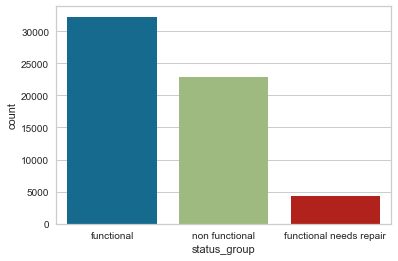

In [2432]:
#This helps to visualize the split among classes 
#Will use a SMOTE technique to balance classes 
#Can also try cost-sensitive learning since this is a multi-class problem; can specifiy custom weights to apply to the classifier itself
sns.countplot(x = 'status_group', data = combined_df)

In [2433]:
#Lets now replace functional, nonfunctional and fucntional needs repair with integers
combined_df['status_group'] = combined_df['status_group'].replace({'functional' : 0, 'non functional':1, 'functional needs repair':2})

combined_df['status_group'].value_counts()

0.0    32259
1.0    22824
2.0     4317
Name: status_group, dtype: int64

In [2434]:
#Viewing data before splitting
#Now 35 features + Target
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             22201 non-null  float64
 1   funder                 69746 non-null  object 
 2   gps_height             48601 non-null  float64
 3   installer              69718 non-null  object 
 4   longitude              71981 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  object 
 10  district_code          74250 non-null  object 
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             38634 non-null  float64
 14  public_meeting         70095 non-null  object 
 15  sc

In [2435]:
#Splitting off final test data
#Ids match up
final_test_features = combined_df.iloc[59400:74250].copy()
final_test_features.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,source_class,waterpoint_type,status_group,waterpoint_age,years_since_inspected,used_pump,consistent_payment,water_quant_class,good_qual_sufficient,above_avg_pop
59400,NaN,Dmdd,1996.0,other,35.290799,-4.059696,Internal,other,Manyara,21,...,surface,other,NaN,3.0,2,0,0,sufficient,0,1
59401,NaN,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Pangani,other,Arusha,2,...,groundwater,communal standpipe,NaN,15.0,2,0,0,poor,0,1
59402,NaN,NaN,1567.0,NaN,34.767863,-5.004344,Internal,other,Singida,13,...,surface,other,NaN,5.0,2,0,0,poor,0,1
59403,NaN,other,267.0,other,38.058046,-9.418672,Ruvuma / Southern Coast,other,Lindi,80,...,groundwater,other,NaN,28.0,2,0,0,poor,0,1
59404,500.0,other,1260.0,other,35.006123,-10.950412,Ruvuma / Southern Coast,other,Ruvuma,10,...,groundwater,communal standpipe,NaN,15.0,2,0,1,sufficient,1,0


In [2436]:
#Now taking final combined df without final test features
#Ids match up
combined_df = combined_df.iloc[0:59400].copy()
combined_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,source_class,waterpoint_type,status_group,waterpoint_age,years_since_inspected,used_pump,consistent_payment,water_quant_class,good_qual_sufficient,above_avg_pop
0,6000.0,Roman,1390.0,other,34.938093,-9.856322,Lake Nyasa,other,Iringa,11,...,groundwater,communal standpipe,0.0,16.0,4,0,1,sufficient,1,0
1,NaN,other,1399.0,other,34.698766,-2.147466,Lake Victoria,other,Mara,20,...,surface,communal standpipe,0.0,5.0,2,0,0,poor,0,1
2,25.0,other,686.0,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,...,surface,communal standpipe multiple,0.0,6.0,2,0,1,sufficient,1,1
3,NaN,Unicef,263.0,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,other,Mtwara,90,...,groundwater,communal standpipe multiple,1.0,29.0,2,0,0,poor,0,0
4,NaN,other,NaN,other,31.130847,-1.825359,Lake Victoria,other,Kagera,18,...,surface,communal standpipe,0.0,NaN,4,0,0,sufficient,0,0


In [2437]:
#Now lets remove the id column as we've confirmed that the ids match up

#combined_df.drop('id', axis=1, inplace=True)
#final_test_features.drop('id', axis=1, inplace=True)

In [2438]:
#Confirming ID is now gone from combined df
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             17761 non-null  float64
 1   funder                 55765 non-null  object 
 2   gps_height             38962 non-null  float64
 3   installer              55745 non-null  object 
 4   longitude              57588 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   subvillage             59029 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  object 
 10  district_code          59400 non-null  object 
 11  lga                    59400 non-null  object 
 12  ward                   59400 non-null  object 
 13  population             30994 non-null  float64
 14  public_meeting         56066 non-null  object 
 15  sc

In [2439]:
#Confirming ID is now gone from final test features
#final_test_features.info()

In [2440]:
#Now lets split the data and begin preprocessing

X = combined_df.drop('status_group', axis=1)
y = combined_df['status_group']

X.shape

(59400, 35)

In [2441]:
from sklearn.model_selection import train_test_split

#The idea here is to split into train/validation/test data sets (80/10/10 since have ample data)
#Will do initial train/test split 

#First breaking off training data, and 'other' data will be further broken off into validation & test in next split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Now split other into validation & test 50/50
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)

(47520, 35) (47520,)


In [2442]:
#Lets view the splits of our data in a df
#This should give us appropriate data to train, validate and test on 

splits = pd.DataFrame({'Train': [X_train.shape[0]], 'Validation': [X_val.shape[0]],
                       'Test': [X_test.shape[0]]})

splits

,Train,Validation,Test
0,47520,5940,5940


In [2443]:
#Now lets check y vals to ensure they have been stratified
#Train Y
#Good
round(y_train.value_counts().apply(lambda x: x/47520),3)

0.0    0.543
1.0    0.384
2.0    0.073
Name: status_group, dtype: float64

In [2444]:
#Validation Y
#Good
round(y_val.value_counts().apply(lambda x: x/5940),3)

0.0    0.548
1.0    0.382
2.0    0.071
Name: status_group, dtype: float64

In [2445]:
#Test Y
#Good
round(y_test.value_counts().apply(lambda x: x/5940),3)

0.0    0.539
1.0    0.387
2.0    0.075
Name: status_group, dtype: float64

In [2446]:
#Lets start by creating a pipeline and our first classifier

#from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE


In [2447]:
#Lets use Target encoding and fit to train data
cbe_encoder = ce.CatBoostEncoder()

#cbe_encoder.fit(X_train, y_train)

#X_train_cbe = cbe_encoder.transform(X_train)
#X_val_cbe = cbe_encoder.transform(X_val)
#X_test_cbe = cbe_encoder.transform(X_test)

In [2448]:
#Can see that it our categorical features have been transformed
#X_train_cbe.head()

In [2449]:
#Can see the that transformatiom above worked when compared to below
#X_train.head()

In [2450]:
#Ensuring that the target was not transformed
y_train.head()

6067     1.0
40148    2.0
54201    1.0
17897    1.0
51509    0.0
Name: status_group, dtype: float64

In [2451]:
#Pulling a fresh list of numeric features as we made some changes during EDA
numeric_feats = X.select_dtypes(include='number').columns.tolist()
print(numeric_feats)
print(len(numeric_feats))


['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'waterpoint_age', 'years_since_inspected', 'used_pump', 'consistent_payment', 'good_qual_sufficient', 'above_avg_pop']
11


In [2452]:
categorical_feats = X.select_dtypes(exclude='number').columns.tolist()
print(categorical_feats)
print(len(categorical_feats))

['funder', 'installer', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management', 'permit', 'construction_year', 'extraction_type_group', 'management', 'management_group', 'payment_type', 'water_quality', 'quality_group', 'quantity_group', 'source', 'source_class', 'waterpoint_type', 'water_quant_class']
24


In [2453]:
#Create numeric and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('impute', IterativeImputer()),
    ('scale', StandardScaler())])

categorical_pipeline = Pipeline(steps=[
    ('cat_encode', ce.CatBoostEncoder()),
    #('mestimate_encode', ce.MEstimateEncoder()),
    ('impute', SimpleImputer(strategy='most_frequent')),
])



In [2454]:
#Creating Full Pipeline
full_processor = ColumnTransformer(transformers=[
    ('categorical', categorical_pipeline, categorical_feats),
    ('numeric', numeric_pipeline, numeric_feats)
])

#Original 07/20 - just flipped order above as a test
#full_processor = ColumnTransformer(transformers=[
#    ('numeric', numeric_pipeline, numeric_feats),
#    ('categorical', categorical_pipeline, categorical_feats)
#])

In [2455]:
#Fit entire data pipeline
full_processor.fit_transform(X_train, y_train)

array([[ 0.52960859,  0.52960859,  0.52960859, ..., -0.73852293,
        -1.00519024,  1.54102573],
       [ 0.52960859,  0.52960859,  0.52960859, ..., -0.73852293,
        -1.00519024,  1.54102573],
       [ 0.76480429,  0.52960859,  0.52960859, ..., -0.73852293,
         0.99483656, -0.64891843],
       ...,
       [ 0.68620804,  0.55063458,  0.60028455, ..., -0.73852293,
        -1.00519024, -0.64891843],
       [ 0.50316273,  0.50436233,  0.4942992 , ..., -0.73852293,
        -1.00519024, -0.64891843],
       [ 0.68581991,  0.55059501,  0.60021124, ..., -0.73852293,
        -1.00519024,  1.54102573]])

In [2456]:
#Can now do the same to transform X_val & X_test
X_train_transformed = full_processor.transform(X_train)
X_val_transformed = full_processor.transform(X_val)
X_test_transformed = full_processor.transform(X_test)
X_final_test_transformed = full_processor.transform(final_test_features)


C:\Users\Matth\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [1772]:
#Checking shape of transformed data
X_train_transformed.shape, X_val_transformed.shape, X_test_transformed.shape

((47520, 34), (5940, 34), (5940, 34))

In [1773]:
#Ensuring that y_train remains as is
y_train.head()

6067     1.0
40148    2.0
54201    1.0
17897    1.0
51509    0.0
Name: status_group, dtype: float64

In [1774]:
#Before fitting models, would like to know what PCA on our features would look like
#Ie how small can we reduce our total # of features to
#**this is purely for exploration purposes; we will tune a grid during hypeparam tuning to find optimal num

pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_transformed)

In [1775]:
#We can see that to retain 95% of the variance, we can reduce down to 6 components 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(pca.n_components_)

[0.1950521  0.13843777 0.11641173 0.10052602 0.09186901 0.08575538
 0.0693445  0.06391683 0.05418865 0.0429103 ]
10


In [1776]:
#Lets all do a quick RF for the purposes of viewing the feature importance plot

rf_feat = RandomForestClassifier(class_weight='balanced')
rf_feat.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced')

In [1777]:
#A few features towards the bottom right that stand out
print(rf_feat.feature_importances_)

[0.03661441 0.02671144 0.01545334 0.01950888 0.01973228 0.01848878
 0.04357477 0.0089782  0.00847473 0.01442134 0.00780574 0.0327446
 0.04230892 0.01229317 0.00618821 0.02042689 0.00711731 0.00623161
 0.06905574 0.02065271 0.00850595 0.03339832 0.01532449 0.06728788
 0.0818235  0.09311578 0.09359217 0.06980099 0.06578071 0.00576141
 0.00662998 0.00747733 0.00871445 0.00600396]


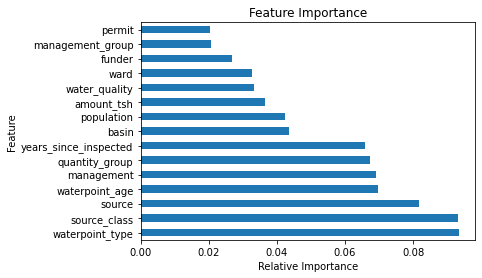

In [1778]:
#Plotting feature importance
#We can see that Source Class, Waterpoint Type, Source and Management Group appear to be important
#Feature Engineering could be done to these to make additional valuable features
feat_importances = pd.Series(rf_feat.feature_importances_, index=X.columns)
fig = feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')


plt.savefig('feature_importance.png', bbox_inches="tight", dpi=300)

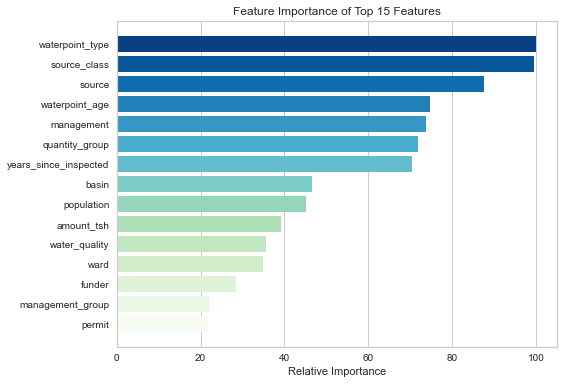

In [1945]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rf_feat, topn=15, title='Feature Importance of Top 15 Features', xlabel='Relative Importance', colormap='GnBu')
viz.fit(X, y)

viz.show(outpath="feat_importances_2.png")

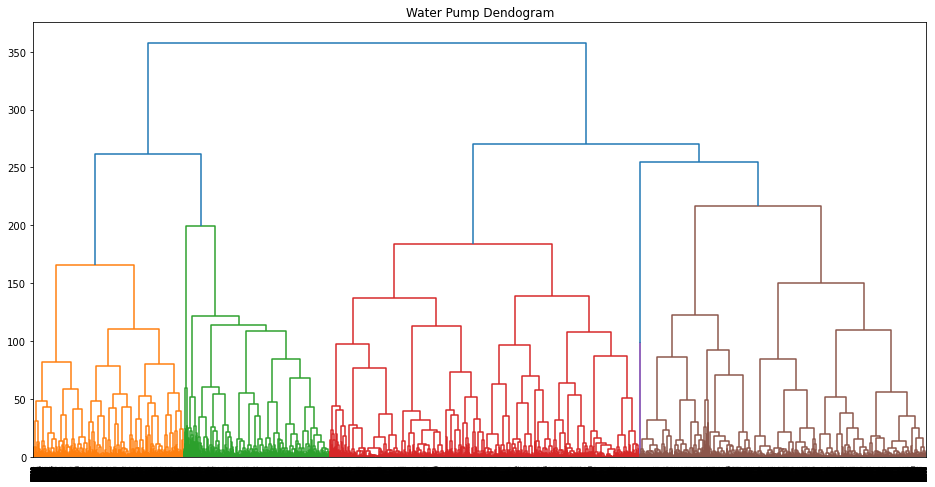

In [915]:
#Lets also try some clustering below
import scipy.cluster 

#Setting up hierarchical algorithm
aggl = scipy.cluster.hierarchy.linkage(X_train_transformed, method='ward', metric='euclidean')

#Plotting the dendrogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Water Pump Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl)

#aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
#plt.figure(figsize=(16, 8));
#plt.grid(False)
#plt.title("Mall Dendogram");  
#dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [918]:
#Trying different types of clustering
from sklearn.metrics import silhouette_score, 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#Trying agglomerative hierarchical clustering again
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage ='ward')
%time agg.fit(X_train_transformed)


AgglomerativeClustering(n_clusters=5)

In [919]:
#Weak score
silhouette_score(X_train_transformed, agg.labels_)

0.15453087936752494

In [165]:
#Now lets try a RF

#Going to try with PCA and variance reduction
rf = RandomForestClassifier(class_weight='balanced')

rf_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('pca', PCA(n_components=6)),
    ('clf', rf)
])

#Original working as of 07/21 - trying to add in PCA and variance reduction above
#rf_pipeline = Pipeline(steps=[
#    ('preprocess', full_processor),
#    ('clf', rf)
#])


In [5440]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                                   'construction_year',
                                                   'extraction_type',
                                       

In [4704]:
base_rf_preds = rf_pipeline.predict(X_val)
#Not great results 
print(f1_score(y_val, base_rf_preds, average='macro'))


0.591875456493373


In [4397]:
#Now lets try using cross-validation
#Creating a baseline model using CV
rf_base_cv_scores = cross_validate(rf_pipeline, X_train, y_train,
                                  scoring='f1_macro', cv=10, n_jobs=-1, verbose=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


In [4398]:
#Very similar results to baseline fit
rf_base_cv_scores = pd.DataFrame(rf_base_cv_scores)

rf_base_cv_scores['test_score'].mean()

0.6343143223925056

In [4399]:
#Now lets try using a gridsearch to find the optimal params
#Defining a grid

rf_grid = {
    'clf__n_estimators':[500,1000],
    'clf__max_depth':[10],
    'clf__criterion': ['gini', 'entropy'],
    'pca__n_components':[5,10,15,20]
}

rf_model = GridSearchCV(rf_pipeline, param_grid=rf_grid,
                        cv=5, n_jobs=-1,
                        scoring = 'f1_macro',
                        return_train_score=True,
                        verbose=1)

%time rf_grid_model = rf_model.fit(X_train, y_train)

#Use below to to run even more params & change cv=10
#    'clf__n_estimators':[500,1000],
#    'clf__max_depth':[None, 3, 10],
#    'clf__criterion': ['gini', 'entropy']

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.1min finished


Wall time: 29min 6s


In [4400]:
#Viewing results of grid search
print(rf_grid_model.best_score_)
print(rf_grid_model.best_params_)

0.6013265273870619
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__n_estimators': 500, 'pca__n_components': 15}


In [4401]:
rf_grid_preds = rf_grid_model.predict(X_val)

print(f1_score(y_val,rf_grid_preds, average='macro'))
print(classification_report(y_val, rf_grid_preds))
print(confusion_matrix(y_val, rf_grid_preds))

0.5969390417857979
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3253
           1       0.85      0.59      0.69      2268
           2       0.23      0.62      0.34       419

    accuracy                           0.68      5940
   macro avg       0.61      0.66      0.60      5940
weighted avg       0.76      0.68      0.70      5940

[[2466  204  583]
 [ 658 1331  279]
 [ 122   36  261]]


In [1779]:
#Going to try an RF again, this time with M-Estimate encoding and no PCA
#Also trying RFE method
rf = RandomForestClassifier(class_weight='balanced')

#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=15) - removed; worse performance by 0.07 with it

#Create numeric and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('impute', IterativeImputer()),
    ('scale', StandardScaler())])

categorical_pipeline_2 = Pipeline(steps=[
    ('mestimate_encode', ce.MEstimateEncoder()),
    ('impute', SimpleImputer(strategy='most_frequent'))])

#Creating Full Pipeline
full_processor_2 = ColumnTransformer(transformers=[
    ('categorical', categorical_pipeline_2, categorical_feats),
    ('numeric', numeric_pipeline, numeric_feats)
])

rf_pipeline_2 = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('clf', rf)
])

In [1780]:
rf_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                              

In [1781]:
#Big Improvement to 0.69 Macro F1
rf_mest_base_preds = rf_pipeline_2.predict(X_val)

print(f1_score(y_val, rf_mest_base_preds, average='macro'))
print(classification_report(y_val, rf_mest_base_preds))

0.684101288905209
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      3253
         1.0       0.84      0.77      0.80      2268
         2.0       0.51      0.34      0.41       419

    accuracy                           0.80      5940
   macro avg       0.72      0.66      0.68      5940
weighted avg       0.80      0.80      0.80      5940



In [1782]:
#Seeing score with cross val
rf_mest_base_cv = cross_validate(rf_pipeline_2, X_train, y_train,
                                cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.6s remaining:   28.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished


In [1784]:
#Remains consistent with CV
rf_mest_base_cv['test_score'].mean()

0.6863339078465434

In [1785]:
#Curious to see if base case gets better with PCA involved
rf_pipeline_3 = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('pca', PCA(n_components=15)),
    ('clf', rf)
])

In [1786]:
rf_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                              

In [1787]:
#Slight decrease with PCA involved; lets see what happens with CV
rf_mest_base_preds_2 = rf_pipeline_3.predict(X_val)

print(f1_score(y_val, rf_mest_base_preds_2, average='macro'))
print(classification_report(y_val, rf_mest_base_preds_2))

0.6621520388962474
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      3253
         1.0       0.81      0.74      0.78      2268
         2.0       0.50      0.31      0.38       419

    accuracy                           0.78      5940
   macro avg       0.70      0.64      0.66      5940
weighted avg       0.78      0.78      0.78      5940



In [4445]:
#Score held with CV; improvement over catboost encoding
rf_mest_base_cv_2 = cross_validate(rf_pipeline_3, X_train, y_train,
                                cv=5, scoring='f1_macro', n_jobs=-1, verbose=1,
                                  return_train_score=True, return_estimator=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.3s remaining:   32.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.6s finished


In [4446]:
#Slight decrease to without PCA
print(rf_mest_base_cv_2['test_score'].mean())

0.6665519257894752


In [4447]:
#Significant drop from train fold to test score; could be overfitting? Maybe due to target leakage from encoding method
rf_mest_base_cv_df = pd.DataFrame(rf_mest_base_cv_2)
rf_mest_base_cv_df.head()

,fit_time,score_time,estimator,test_score,train_score
0,19.035858,0.442816,(ColumnTransformer(transformers=[('categorical...,0.674507,0.993478
1,19.096695,0.408906,(ColumnTransformer(transformers=[('categorical...,0.659089,0.994367
2,18.965045,0.416886,(ColumnTransformer(transformers=[('categorical...,0.674003,0.994383
3,18.667333,0.371007,(ColumnTransformer(transformers=[('categorical...,0.657838,0.993734
4,18.752108,0.389955,(ColumnTransformer(transformers=[('categorical...,0.667323,0.993569


In [6793]:
#Now lets try a basic gridsearch
#Use pipeline WITHOUT PCA
rf_grid = {
    'clf__n_estimators':[500,750,1000],
    'clf__max_depth':[None,5,10,20],
    'clf__criterion': ['gini']
}

rf_model_2 = GridSearchCV(rf_pipeline_2, param_grid=rf_grid,
                        cv=10, n_jobs=-1,
                        scoring = 'f1_macro',
                        return_train_score=True,
                        verbose=2)

%time rf_grid_model_2 = rf_model_2.fit(X_train, y_train)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 33.0min finished


Wall time: 33min 50s


In [6794]:
#Viewing results of grid search
#Better with base params; find out what they are
print(rf_grid_model_2.best_score_)
print(rf_grid_model_2.best_params_)

0.6984917288903942
{'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 500}


In [6795]:
#Now predict on validation set
#Generalized well to validation set

rf_grid_model_2_preds = rf_grid_model_2.predict(X_val)

print(f1_score(y_val, rf_grid_model_2_preds, average='macro'))
print(classification_report(y_val, rf_grid_model_2_preds))
print(confusion_matrix(y_val, rf_grid_model_2_preds))


0.6949820682558506
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      3253
         1.0       0.85      0.77      0.80      2268
         2.0       0.42      0.47      0.44       419

    accuracy                           0.80      5940
   macro avg       0.69      0.70      0.69      5940
weighted avg       0.80      0.80      0.80      5940

[[2792  261  200]
 [ 461 1736   71]
 [ 171   51  197]]


In [6798]:
#Veryfying on test set

rf_grid_model_2_final_preds = rf_grid_model_2.predict(X_test)

print(f1_score(y_test, rf_grid_model_2_final_preds, average='macro'))
print(classification_report(y_test, rf_grid_model_2_final_preds))
print(confusion_matrix(y_test, rf_grid_model_2_final_preds))


0.7048076673310173
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      3199
         1.0       0.86      0.78      0.82      2297
         2.0       0.44      0.48      0.46       444

    accuracy                           0.80      5940
   macro avg       0.71      0.71      0.70      5940
weighted avg       0.81      0.80      0.80      5940

[[2757  236  206]
 [ 438 1796   63]
 [ 167   66  211]]


In [1788]:
#Now refitting on entire training using the best params

rf_final = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=20, n_estimators=500)

rf_pipeline_final = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('clf', rf_final)
])

In [1789]:
rf_pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                              

In [1790]:
#Running CV

rf_final_pipe_cv = cross_validate(rf_pipeline_final, X_train, y_train,
                                cv=5, scoring='f1_macro', n_jobs=-1, verbose=1,
                                  return_train_score=True, return_estimator=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [1791]:
#Viewing CV results
print(rf_final_pipe_cv['test_score'].mean())

0.6962508521738812


In [1792]:
#Predicting on validation set
rf_final_pipe_val_preds = rf_pipeline_final.predict(X_val)

print(f1_score(y_val, rf_final_pipe_val_preds, average='macro'))
print(classification_report(y_val, rf_final_pipe_val_preds))
print(confusion_matrix(y_val, rf_final_pipe_val_preds))

0.6955537521898251
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      3253
         1.0       0.85      0.77      0.81      2268
         2.0       0.43      0.45      0.44       419

    accuracy                           0.80      5940
   macro avg       0.70      0.69      0.70      5940
weighted avg       0.80      0.80      0.80      5940

[[2815  251  187]
 [ 468 1736   64]
 [ 177   52  190]]


In [1793]:
#Predicting on test set

rf_final_pipe_test_preds = rf_pipeline_final.predict(X_test)

print(f1_score(y_test, rf_final_pipe_test_preds, average='macro'))
print(classification_report(y_test, rf_final_pipe_test_preds))
print(confusion_matrix(y_test, rf_final_pipe_test_preds))

0.7099132634420702
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      3199
         1.0       0.86      0.78      0.82      2297
         2.0       0.47      0.46      0.47       444

    accuracy                           0.81      5940
   macro avg       0.72      0.71      0.71      5940
weighted avg       0.81      0.81      0.81      5940

[[2805  225  169]
 [ 447 1790   60]
 [ 174   66  204]]


In [4485]:
#Lets look at feature importances
rf_feat_imp = rf_pipeline_2.named_steps['clf'].feature_importances_
rf_feat_imp

array([0.06005424, 0.06002445, 0.05128704, 0.05387507, 0.05806035,
       0.07295881, 0.11234697, 0.07654609, 0.12818089, 0.0537668 ,
       0.05895946, 0.0517    , 0.04997545, 0.05657436, 0.05569002])

In [5243]:
#Trying again, this time with random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf_rand_grid = {
    'clf__n_estimators': [100,250,400,500,700,1000],
    'clf__max_depth': [None, 5, 10, 20, 30],
    'clf__min_samples_split': [2,6,10,20],
    'clf__min_samples_leaf': [1,4,8,15],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_leaf_nodes': [5,15,30,45]
}

rf_model_5 = RandomizedSearchCV(rf_pipeline_2, param_distributions=rf_rand_grid, n_iter= 100,
                        cv=5, n_jobs=-1,
                        scoring = 'f1_macro',
                        return_train_score=True,
                        verbose=1)

%time rf_grid_model_5 = rf_model_5.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 42.4min finished


Wall time: 42min 54s


In [5245]:
print(rf_grid_model_5.best_score_)
print(rf_grid_model_5.best_params_)

0.5807996546522447
{'clf__n_estimators': 700, 'clf__min_samples_split': 20, 'clf__min_samples_leaf': 15, 'clf__max_leaf_nodes': 45, 'clf__max_depth': 30, 'clf__criterion': 'gini'}


In [5247]:
rf_grid_5_preds = rf_grid_model_5.predict(X_val)

print(classification_report(y_val, rf_grid_5_preds))
print(confusion_matrix(y_val, rf_grid_5_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3253
           1       0.83      0.56      0.67      2268
           2       0.21      0.70      0.32       419

    accuracy                           0.64      5940
   macro avg       0.60      0.65      0.57      5940
weighted avg       0.74      0.64      0.67      5940

[[2272  224  757]
 [ 644 1259  365]
 [  92   35  292]]


# Lets try this one more time, this time adding in a feature selection method
from sklearn.feature_selection import SelectKBest, chi2, f_classif
rf_pipeline_4 = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('feature_selection', SelectKBest(f_classif, k=20)),
    ('clf', rf)
])

In [5213]:
rf_pipeline_4.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                                   'construction_year',
                                                   'extraction_type',
                                       

In [5214]:
#Bit of a dip in performance compared to as is
rf_pipe4_base_preds = rf_pipeline_4.predict(X_val)

print(f1_score(y_val, rf_pipe4_base_preds, average='macro'))
print(classification_report(y_val, rf_pipe4_base_preds))

0.6609636251863825
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3253
           1       0.79      0.76      0.78      2268
           2       0.39      0.40      0.39       419

    accuracy                           0.77      5940
   macro avg       0.66      0.66      0.66      5940
weighted avg       0.77      0.77      0.77      5940



In [5446]:
#Making preds on final dataset
#Going to use RF pipeline 2

final_preds_1 = rf_pipeline_2.predict(final_test_features)
print(final_preds_1)

C:\Users\Matth\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


[0. 2. 0. ... 0. 0. 1.]


In [176]:
#Creating submission file

submission_1 = pd.DataFrame({'id': test_features.iloc[:,0], 'status_group': final_preds_1})

def convert_status(df):
    if df['status_group'] == 0.0:
        return 'functional'
    elif df['status_group'] == 1.0:
        return 'non functional'
    elif df['status_group'] == 2.0:
        return 'functional needs repair'

In [5470]:
submission_1.head()

,id,status_group
0,50785,0.0
1,51630,2.0
2,17168,0.0
3,45559,1.0
4,49871,0.0


In [5471]:
submission_1['status_group'] = submission_1.apply(convert_status, axis=1)

In [5473]:
#Viewing Converted results
print(len(submission_1))
submission_1.head()

14850


,id,status_group
0,50785,functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional


In [5474]:
#Pushing to CSV
submission_1.to_csv('rf_preds_pipe2.csv', index=False)

In [1794]:
#Creating more submissions, this time from the best performing pipeline (rf_pipeline_final)

final_preds_2 = rf_pipeline_final.predict(final_test_features)
print(final_preds_2)

C:\Users\Matth\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


[0. 0. 0. ... 0. 0. 1.]


In [1795]:
submission_2 = pd.DataFrame({'id': test_features.iloc[:,0], 'status_group': final_preds_2})

submission_2.head()

,id,status_group
0,50785,0.0
1,51630,0.0
2,17168,0.0
3,45559,1.0
4,49871,0.0


In [1796]:
submission_2['status_group'] = submission_2.apply(convert_status, axis=1)

In [1797]:
#Viewing Converted results
print(len(submission_2))
submission_2.head()

14850


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [1798]:
#Pushing to CSV
submission_2.to_csv('rf_finalpipe_preds_2.csv', index=False)

In [5215]:
#Now lets try an XGboost model
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [6465]:
#Setting up base XGB pipe

xgb_pipeline = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('clf', xgb)
])


In [6466]:
#Fitting the baseline model
#Slightly worse than base RF
xgb_pipeline.fit(X_train, y_train)

base_xgb_preds = xgb_pipeline.predict(X_val)

#Not great results but better than RF
print(f1_score(y_val, base_xgb_preds, average='macro'))
print(classification_report(y_val, base_xgb_preds))

C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6612133225020422
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84      3253
         1.0       0.84      0.74      0.78      2268
         2.0       0.64      0.25      0.36       419

    accuracy                           0.80      5940
   macro avg       0.75      0.63      0.66      5940
weighted avg       0.79      0.80      0.78      5940



In [5218]:
#Now lets try with cross validation
xgb_base_cv_scores = cross_validate(xgb_pipeline, X_train, y_train,
                                   scoring='f1_macro', cv=5)


C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [4887]:
#Similar to above; still slightly worse than RF
xgb_base_cv_scores = pd.DataFrame(xgb_base_cv_scores)
xgb_base_cv_scores['test_score'].mean()

0.6633689811900869

In [5284]:
#Now trying XGB grid search

xgb_param_grid = {
             'clf__min_child_weight': [1,5,10],
             'clf__n_estimators' :[100],
             'clf__max_depth': [3,4,5],  
             'clf__gamma': [0,0.5,4],
             'clf__subsample': [0.8,1.0], 
             'clf__colsample_bytree': [0.6,1],
             }


xgb_grid = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid,
                       cv=5, scoring='f1_macro',
                       n_jobs=-1, verbose=2)


xgb_grid_model = xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 35.7min finished
C:\Users\Matth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [5285]:
#Slightly worse than base performance; 0.64
print(xgb_grid_model.best_score_)
print(xgb_grid_model.best_params_)

0.644956579123741
{'clf__colsample_bytree': 0.6, 'clf__gamma': 0, 'clf__max_depth': 5, 'clf__min_child_weight': 1, 'clf__n_estimators': 100, 'clf__subsample': 0.8}


In [2373]:
#Creating classification rate metric (what is actually used in the comp)
#def classification_rate(y, y_pred):
#    return np.sum(y==y_pred)/len(y)

#print(classification_rate(y_val, base_xgb_preds))
#print(classification_rate(y_val, rf_grid_preds))

0.12154882154882155
0.1111111111111111


In [1799]:
#Trying Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()

etc_pipeline = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('clf', etc)
])

In [1800]:
etc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                              

In [1801]:
etc_base_preds = etc_pipeline.predict(X_val)

print(f1_score(y_val, etc_base_preds, average='macro'))
print(classification_report(y_val, etc_base_preds))

0.6818116135761739
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      3253
         1.0       0.81      0.77      0.79      2268
         2.0       0.49      0.37      0.42       419

    accuracy                           0.79      5940
   macro avg       0.70      0.67      0.68      5940
weighted avg       0.79      0.79      0.79      5940



In [1802]:
#Performance not bad, similar to that of RF
etc_base_cv = cross_validate(etc_pipeline, X_train, y_train,
                             cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

etc_base_cv['test_score'].mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.0s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished


0.6791428057642681

In [183]:
#Seems not bad; lets try with a grid search
etc_grid = {
    'clf__n_estimators':[300,500,1000],
    'clf__max_depth':[None,5,20],
    'clf__criterion': ['gini']
}

etc_model = GridSearchCV(etc_pipeline, param_grid=etc_grid,
                        cv=5, n_jobs=-1,
                        scoring = 'f1_macro',
                        return_train_score=True,
                        verbose=2)

%time etc_grid_model = etc_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished


Wall time: 8min 41s


In [184]:
print(etc_model.best_score_)
print(etc_model.best_params_)

0.6809497895799794
{'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__n_estimators': 1000}


In [5229]:
#Lets do another grid search with results of the previous one in mind
#Side note, was very quick to compute

etc_grid_2 = {
    'clf__n_estimators':[150, 300, 450, 600],
    'clf__max_depth':[None, 2, 4],
    'clf__criterion': ['gini'],
    'clf__max_leaf_nodes':[5,10,50],
    'clf__min_samples_leaf':[1,10,50],
    'clf__min_samples_split':[2,10,50]   
}

etc_model_2 = GridSearchCV(etc_pipeline, param_grid=etc_grid_2,
                        cv=5, n_jobs=-1,
                        scoring = 'f1_macro',
                        return_train_score=True,
                        verbose=2)

%time etc_grid_model_2 = etc_model_2.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 56.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 63.3min finished


Wall time: 1h 3min 29s


In [5230]:
print(etc_grid_model_2.best_score_)
print(etc_grid_model_2.best_params_)

0.501965157631506
{'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_leaf_nodes': 50, 'clf__min_samples_leaf': 50, 'clf__min_samples_split': 10, 'clf__n_estimators': 150}


In [1876]:
#Creating final ET pipeline based on results of CV

etc = ExtraTreesClassifier(class_weight='balanced', max_depth=None, criterion='gini', n_estimators= 1000)

etc_pipeline_final = Pipeline(steps=[
    ('preprocess', full_processor_2),
    ('clf', etc)
])

etc_pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   MEstimateEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                              

In [1877]:
#Predicting on validation

etc_val_preds = etc_pipeline_final.predict(X_val)


print(f1_score(y_val, etc_val_preds, average='macro'))
print(classification_report(y_val, etc_val_preds))
print(confusion_matrix(y_val, etc_val_preds))

0.6787171434722374
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      3253
         1.0       0.82      0.77      0.79      2268
         2.0       0.46      0.37      0.41       419

    accuracy                           0.79      5940
   macro avg       0.69      0.67      0.68      5940
weighted avg       0.79      0.79      0.79      5940

[[2801  327  125]
 [ 465 1743   60]
 [ 196   67  156]]


In [1878]:
#Predicting on Test

etc_test_preds = etc_pipeline_final.predict(X_test)


print(f1_score(y_test, etc_test_preds, average='macro'))
print(classification_report(y_test, etc_test_preds))
print(confusion_matrix(y_test, etc_test_preds))

0.6896231738370054
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      3199
         1.0       0.82      0.78      0.80      2297
         2.0       0.49      0.39      0.44       444

    accuracy                           0.79      5940
   macro avg       0.71      0.68      0.69      5940
weighted avg       0.79      0.79      0.79      5940

[[2754  311  134]
 [ 460 1787   50]
 [ 190   79  175]]


In [1803]:
#Trying a catboost model
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=2000,
                        loss_function='MultiClass')


In [1804]:
#Creating catboost pipeline
cbc_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('clf', cbc)
])


In [1805]:
cbc_pipeline.fit(X_train, y_train)

Learning rate set to 0.053638
0:	learn: 1.0596408	total: 54.9ms	remaining: 1m 49s
1:	learn: 1.0253897	total: 78.4ms	remaining: 1m 18s
2:	learn: 0.9943951	total: 103ms	remaining: 1m 8s
3:	learn: 0.9677365	total: 129ms	remaining: 1m 4s
4:	learn: 0.9433976	total: 153ms	remaining: 1m 1s
5:	learn: 0.9213887	total: 177ms	remaining: 58.7s
6:	learn: 0.9024664	total: 209ms	remaining: 59.6s
7:	learn: 0.8846765	total: 241ms	remaining: 1m
8:	learn: 0.8685240	total: 271ms	remaining: 59.9s
9:	learn: 0.8541622	total: 301ms	remaining: 59.9s
10:	learn: 0.8402480	total: 331ms	remaining: 59.8s
11:	learn: 0.8266436	total: 352ms	remaining: 58.3s
12:	learn: 0.8147355	total: 371ms	remaining: 56.7s
13:	learn: 0.8036201	total: 399ms	remaining: 56.6s
14:	learn: 0.7939610	total: 424ms	remaining: 56.1s
15:	learn: 0.7847029	total: 449ms	remaining: 55.7s
16:	learn: 0.7764370	total: 472ms	remaining: 55s
17:	learn: 0.7687464	total: 501ms	remaining: 55.2s
18:	learn: 0.7607165	total: 525ms	remaining: 54.7s
19:	learn: 0

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('mestimate_encode',
                                                                   CatBoostEncoder()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funder', 'installer',
                                                   'basin', 'region',
                                                   'region_code',
                                                   'district_code', 'lga',
                                                   'ward', 'public_meeting',
                                                   'scheme_management',
                                                   'permit',
                                               

In [1806]:
#Make some baseline preds
cbc_base_preds = cbc_pipeline.predict(X_val)

print(f1_score(y_val, cbc_base_preds, average='macro'))
print(classification_report(y_val, cbc_base_preds))
print(confusion_matrix(y_val, cbc_base_preds))

0.6465503031373309
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83      3253
         1.0       0.81      0.73      0.77      2268
         2.0       0.64      0.24      0.35       419

    accuracy                           0.78      5940
   macro avg       0.74      0.62      0.65      5940
weighted avg       0.78      0.78      0.77      5940

[[2888  319   46]
 [ 604 1653   11]
 [ 241   78  100]]


In [1871]:
cbc_test_preds = cbc_pipeline.predict(X_test)

print(f1_score(y_test, cbc_test_preds, average='macro'))
print(classification_report(y_test, cbc_test_preds))
print(confusion_matrix(y_test, cbc_test_preds))

0.6524153886546497
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      3199
         1.0       0.83      0.73      0.78      2297
         2.0       0.59      0.25      0.35       444

    accuracy                           0.79      5940
   macro avg       0.73      0.63      0.65      5940
weighted avg       0.78      0.79      0.77      5940

[[2878  271   50]
 [ 585 1686   26]
 [ 263   72  109]]


In [5490]:
#Now predict on final data set as a test
cbc_base_final_pred = cbc_pipeline.predict(final_test_features)
cbc_base_final_pred
#combined_df['status_group'] = combined_df['status_group'].replace({'functional' : 0, 'non functional':1, 'functional needs repair':2})

C:\Users\Matth\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [5492]:
#Creating DF with final results
submission_2 = pd.DataFrame({'id': test_features.iloc[:,0], 'status_group': cbc_base_final_pred[:, 0]})

submission_2['status_group'] = submission_2.apply(convert_status, axis =1)

In [5494]:
submission_2.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [5496]:
#Pushing to CSV
submission_2.to_csv('rf_preds_cat_2.csv', index=False)

In [2457]:
#Now trying FLAML
from flaml import AutoML

automl = AutoML()

In [2458]:
automl_settings = {
    'time_budget':300,
    'metric': 'macro_f1',
    'task': 'classification',
    'estimator_list' : ['lgbm', 'xgboost', 'catboost', 'rf', 'extra_tree'],
    'eval_method': ['cv'],
    'n_splits': 5,
}

#ensemble = True
#Can also try running each model individually ie estimator_list just lgbm and then put each of them into a stacking classifier 
automl.fit(X_train_transformed, y_train, **automl_settings, ensemble=True)

[flaml.automl: 08-02 23:45:37] {911} INFO - Evaluation method: ['cv']
[flaml.automl: 08-02 23:45:37] {606} INFO - Using StratifiedKFold
[flaml.automl: 08-02 23:45:37] {932} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl: 08-02 23:45:37] {951} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'catboost', 'rf', 'extra_tree']
[flaml.automl: 08-02 23:45:37] {1017} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-02 23:45:38] {1172} INFO -  at 0.5s,	best lgbm's error=0.5384,	best lgbm's error=0.5384
[flaml.automl: 08-02 23:45:38] {1017} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-02 23:45:38] {1172} INFO -  at 0.7s,	best lgbm's error=0.5384,	best lgbm's error=0.5384
[flaml.automl: 08-02 23:45:38] {1017} INFO - iteration 2, current learner lgbm
[flaml.automl: 08-02 23:45:38] {1172} INFO -  at 1.1s,	best lgbm's error=0.5228,	best lgbm's error=0.5228
[flaml.automl: 08-02 23:45:38] {1017} INFO - iteration 3, current learner lgbm
[flaml.automl: 08-0

In [2459]:
#Viewing Performance
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 52.0, 'num_leaves': 147.0, 'min_child_samples': 39.0, 'learning_rate': 0.3118033055964255, 'subsample': 0.8795964385843147, 'log_max_bin': 7.0, 'colsample_bytree': 0.6243045158556154, 'reg_alpha': 0.17615692190059898, 'reg_lambda': 0.11112372147269253, 'FLAML_sample_size': 47520}
Best accuracy on validation data: 0.6768
Training duration of best run: 6.971 s


In [1817]:
#View best params
automl.model.estimator

AttributeError: 'StackingClassifier' object has no attribute 'estimator'

In [2460]:
automl_preds_1 = automl.predict(X_val_transformed)
print('Predicted labels', automl_preds_1)
print('True labels', y_val)
#automl_preds_1_proba = automl.predict_proba(X_val)[:,1]

Predicted labels [2. 0. 1. ... 0. 0. 1.]
True labels 22298    2.0
18599    0.0
24339    1.0
14342    1.0
43671    0.0
        ... 
44462    0.0
30150    0.0
40006    0.0
31065    0.0
52144    1.0
Name: status_group, Length: 5940, dtype: float64


In [2461]:
#Computing Metrics
from flaml.ml import sklearn_metric_loss_score
from flaml.ml import multi_class_curves, norm_confusion_matrix
print('accuracy','=', 1- sklearn_metric_loss_score('accuracy', automl_preds_1, y_val))
print('Macro F1 Score','=', 1- sklearn_metric_loss_score('macro_f1', automl_preds_1, y_val))
print(classification_report(y_val, automl_preds_1))
print(confusion_matrix(y_val, automl_preds_1))

accuracy = 0.7984848484848485
Macro F1 Score = 0.6638724700370173
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84      3253
         1.0       0.84      0.76      0.80      2268
         2.0       0.50      0.27      0.35       419

    accuracy                           0.80      5940
   macro avg       0.71      0.64      0.66      5940
weighted avg       0.79      0.80      0.79      5940

[[2911  259   83]
 [ 521 1718   29]
 [ 243   62  114]]


In [2462]:
#Now Predict on test set to see if generalizes well
#Very similar to results in validation set; generalized well
automl_preds_test_1 = automl.predict(X_test_transformed)
automl_preds_test_probab = automl.predict_proba(X_test_transformed)

print('accuracy','=', 1- sklearn_metric_loss_score('accuracy', automl_preds_test_1, y_test))
print('Macro F1 Score','=', 1- sklearn_metric_loss_score('macro_f1', automl_preds_test_1, y_test))
print(classification_report(y_test, automl_preds_test_1))
print(confusion_matrix(y_test, automl_preds_test_1))

accuracy = 0.8015151515151515
Macro F1 Score = 0.675243506219109
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      3199
         1.0       0.85      0.76      0.80      2297
         2.0       0.54      0.29      0.38       444

    accuracy                           0.80      5940
   macro avg       0.73      0.65      0.68      5940
weighted avg       0.80      0.80      0.79      5940

[[2883  235   81]
 [ 519 1748   30]
 [ 246   68  130]]


C:\Users\Matth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


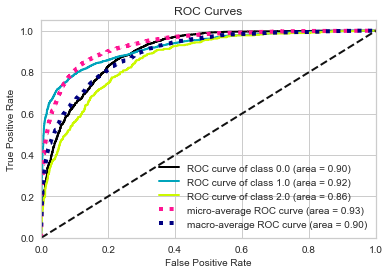

In [2465]:
import scikitplot as skplt
#curve = multi_class_curves(y_test, automl_preds_test_probab, curve_func=roc_curve)

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
roc = skplt.metrics.plot_roc_curve(y_test, automl_preds_test_probab)
plt.savefig('ROC_curve.png', bbox_inches="tight", dpi=300)

plt.show()

In [ ]:
from yellowbrick.classifier import ROCAUC

oz = ROCAUC(LogisticRegression())
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

In [1868]:
#Make preds on final dataset
automl_final_preds = automl.predict(X_final_test_transformed)

automl_final_preds

C:\Users\Matth\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([0., 0., 0., ..., 0., 0., 1.])

In [1869]:
submission_3 = pd.DataFrame({'id': test_features.iloc[:,0], 'status_group': automl_final_preds})

#submission_3['status_group'] = submission_2.apply(convert_status, axis =1)

In [1870]:
submission_3.head()

,id,status_group
0,50785,0.0
1,51630,0.0
2,17168,0.0
3,45559,1.0
4,49871,0.0


In [1829]:
#Something wrong with function in this case; not converting properly
#submission_3['status_group'] = submission_2.apply(convert_status, axis =1)
#submission_3.head()

,id,status_group
0,50785,None
1,51630,None
2,17168,None
3,45559,None
4,49871,None


In [1853]:
#Export to csv - will fix manually

submission_3.to_csv('submission_6_cat.csv', index=False)


In [1977]:
automl_preds_df = pd.DataFrame({'Predictions': automl_preds_test_1})

automl_preds_df

,Predictions
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
5935,0.0
5936,0.0
5937,1.0
5938,1.0


In [1975]:
y_test_df = pd.DataFrame({'y_test': y_test})

y_test_df

,y_test
56418,0.0
36315,1.0
26050,0.0
40014,1.0
24235,0.0
...,...
12529,0.0
19077,0.0
29894,1.0
19975,1.0


In [1978]:
#Won't let me combine in Python - pushing to csv to manually fix and will read back in
automl_preds_df.to_csv('automl_preds_df.csv', index=False)
y_test_df.to_csv('y_test_df.csv', index=False)


In [1983]:
impact_df = pd.read_csv(r'C:\Users\Matth\Desktop\Matthew\Smith MMA\MMA 869 - Machine Learning & AI\Final Team Project\impact_df.csv')

impact_df.head()

,Predictions,y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [1984]:
def impact(df):
    if df['Predictions'] == 1 and df['y_test'] == 1:
        return 1
    elif df['Predictions'] == 2 and df['y_test'] == 2:
        return 1
    elif df['Predictions'] == 1 and df['y_test'] == 2:
        return 1
    elif df['Predictions'] == 2 and df['y_test'] == 1:
        return 1
    else:
        return 0
    

impact_df['impact'] = impact_df.apply(impact, axis = 1)

In [1985]:
impact_df.head()

,Predictions,y_test,impact
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,0,0,0


In [1986]:
#Good; adds up to correct amount of total TPs of identifying either Functional needs repair or Needs Repair
impact_df['impact'].sum()

2020

In [2298]:
#Again Exporting to csv for the sake of time; will clean and import back
impact_df.to_csv('impact_df_2.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

In [2008]:
impact_df_2 = pd.read_csv(r'C:\Users\Matth\Desktop\Matthew\Smith MMA\MMA 869 - Machine Learning & AI\Final Team Project\impact_df_2.csv')

In [2009]:
impact_df_2.head()

,population,impact
0,100.0,0
1,NaN,1
2,NaN,0
3,NaN,1
4,NaN,0


In [2010]:
#imputing population
imp = IterativeImputer()

impact_df_2_transformed = imp.fit_transform(impact_df_2)

In [2011]:
impact_df_2_transformed

array([[100.        ,   0.        ],
       [271.63645812,   1.        ],
       [294.74578309,   0.        ],
       ...,
       [  1.        ,   1.        ],
       [  1.        ,   1.        ],
       [ 56.        ,   1.        ]])

In [2012]:
#Converting back to df

impact_df_2_transformed = pd.DataFrame({'Population': impact_df_2_transformed[:,0],'Impact': impact_df_2_transformed[:,1] })


In [2014]:
#Imputation Worked
impact_df_2_transformed.isnull().sum()

Population    0
Impact        0
dtype: int64

In [2015]:
impact_df_2_transformed.head()

,Population,Impact
0,100.000000,0.0
1,271.636458,1.0
2,294.745783,0.0
3,271.636458,1.0
4,294.745783,0.0


In [2016]:
#Exporting to excel so can create plot in R

impact_df_2_transformed.to_excel('impact_df_2_transformed.xlsx', index=False)